In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np

''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################


(406, 9)


In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


## 1. How many cars and how many attributes are in the data set

In [3]:
data.duplicated().sum()

0

In [4]:
len(data),len(data.columns)

(406, 9)

## 2. How many distinct car companies are represented in the data set? What is the name of the car with the best MPG? What car company produced the most 8-cylinder cars? What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

In [5]:
len(data['car_name'].value_counts())

312

In [6]:
temp = data[['mpg','car_name']]
temp.loc[temp['mpg'].idxmax()]

mpg              46.6
car_name    mazda glc
Name: 329, dtype: object

In [7]:
temp = data.loc[data['cylinders'] == 8.0]
temp['car_name'].mode()

0    chevrolet impala
dtype: object

What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

## 3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential missing values

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins. Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

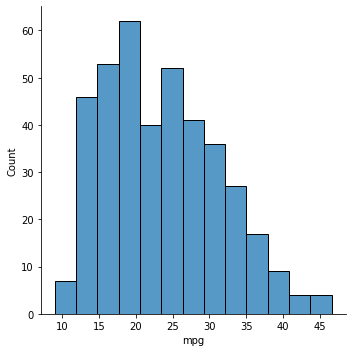

In [9]:
sns.displot(data['mpg'])

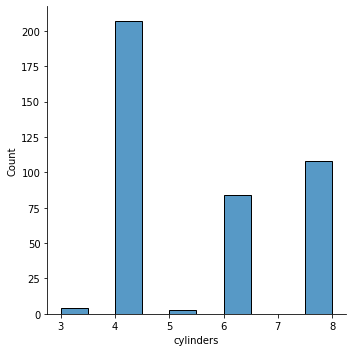

In [10]:
sns.displot(data['cylinders'])

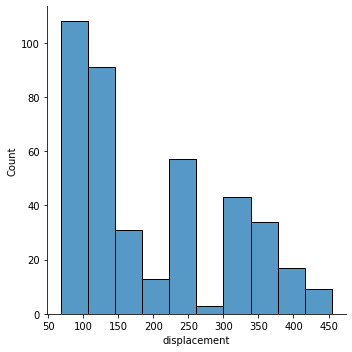

In [11]:
sns.displot(data['displacement'])

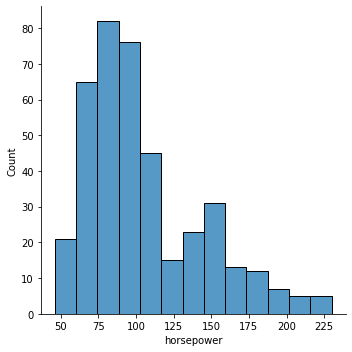

In [12]:
sns.displot(data['horsepower'])

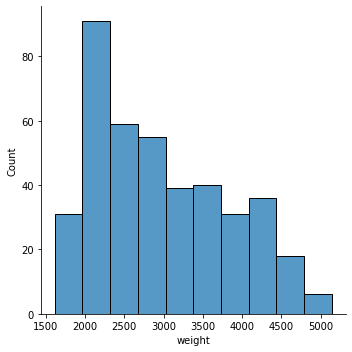

In [13]:
sns.displot(data['weight'])

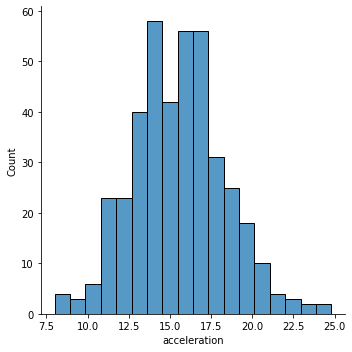

In [14]:
sns.displot(data['acceleration'])

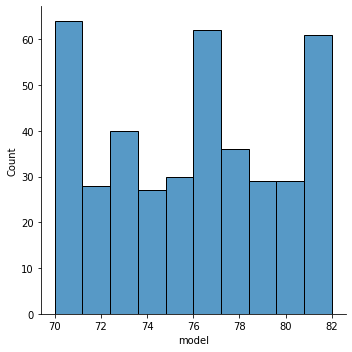

In [15]:
sns.displot(data['model'])

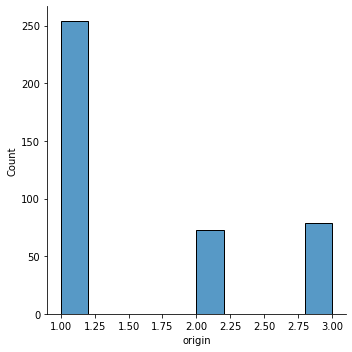

In [20]:
sns.displot(data['origin'])

## 5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship between the attributes? What is the correlation coefficient between the 2 attributes?

          weight       mpg
weight  1.000000 -0.831741
mpg    -0.831741  1.000000


/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


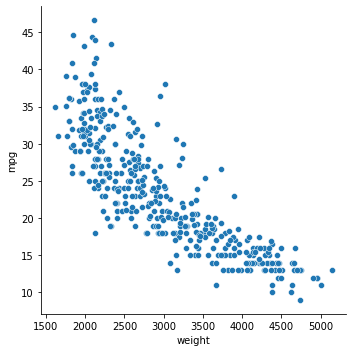

In [17]:
temp = data[['weight','mpg']]
print(temp.corr())
sns.relplot(temp['weight'],temp['mpg'])